In [1]:
import os
import numpy as np
from sklearn import linear_model
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

# Very simple graph (scalars)

`tensorboard --logdir=/tmp/tensorflow/00_tensorboard/logs_01_scalars`

In [12]:
logdir='/tmp/tensorflow/00_tensorboard/logs_01_scalars'
if os.path.exists(logdir):
    os.system('rm -rf {}'.format(logdir))

with tf.Graph().as_default() as graph:
    a = tf.constant(1, name='a')
    b = tf.constant(2, name='b')
    c = tf.add(a, b, name='c')
    d = tf.multiply(a, c, name='d')

with tf.Session(graph=graph) as sess:    
    file_writer = tf.summary.FileWriter(logdir, graph)
    d_out = sess.run(d)

# Very simple graph (tensors)

`tensorboard --logdir=/tmp/tensorflow/00_tensorboard/logs_02_tensors`

In [18]:
logdir='/tmp/tensorflow/00_tensorboard/logs_02_tensors'
if os.path.exists(logdir):
    os.system('rm -rf {}'.format(logdir))

with tf.Graph().as_default() as graph:
    a = tf.constant([[1,2], [3,4], [4,5]], name='a')  # 3x2 matrix
    b = tf.constant([[1,2,3], [4,5,6]], name='b')     # 2x3 matrix
    c = tf.matmul(a, b, name='c')

with tf.Session(graph=graph) as sess:    
    file_writer = tf.summary.FileWriter(logdir, graph)
    c_out = sess.run(c)
c_out

array([[ 9, 12, 15],
       [19, 26, 33],
       [24, 33, 42]], dtype=int32)

# Linear Regression

In [4]:
# Create mock data, solve an sklearn linear model
Nsamp = 50
Nfeatures = 1
xarr = np.linspace(-0.5, 0.5, Nsamp)
np.random.seed(83749)
beta_0 = -2.0
beta_1 = 4.3
yarr = (beta_0 + beta_1 * xarr) + (np.random.normal(size=Nsamp) * 0.5)

mdl = linear_model.LinearRegression(fit_intercept=False)
mdl = mdl.fit(np.c_[np.ones(Nsamp), xarr], yarr)
mdl.coef_

array([-2.0517912 ,  4.08511933])

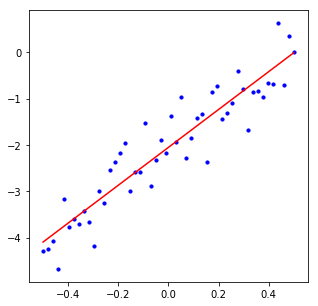

In [5]:
fig, ax = plt.subplots(figsize=(5,5))
plt.scatter(xarr, yarr, s=10, color='blue')
plt.plot(xarr, mdl.coef_[0] + mdl.coef_[1] * xarr, color='red')

In [6]:
logdir='/tmp/tensorflow/00_tensorboard/logs'
if os.path.exists(logdir):
    print('removing logdir')
    os.system('rm -rf {}'.format(logdir))

with tf.Graph().as_default() as graph:

    Nfeatures=1
    X = tf.placeholder(tf.float32, [None, Nfeatures], name='X')
    y = tf.placeholder(tf.float32, [None, 1], name='y')

    with tf.name_scope('logit'):
        W = tf.Variable(tf.random_normal([Nfeatures, 1]), name='W')
        b = tf.Variable(tf.zeros([1]), name='b')
        z = tf.matmul(X, W) + b
        
        tf.summary.histogram('weights', W)
        tf.summary.histogram('biases', b)
        tf.summary.histogram('z', z)
            
    with tf.name_scope('mse'):
        loss = tf.reduce_mean(tf.squared_difference(z, y), name='loss')
        tf.summary.scalar('loss', loss)
        
    with tf.name_scope('train'):
        learning_rate = 0.1
        train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
    
    merged_summary = tf.summary.merge_all()
    
feed_dict = {X: xarr.reshape(Nsamp, 1), y: yarr.reshape(Nsamp,1)}
with tf.Session(graph=graph) as sess:    
    
    sess.run(tf.global_variables_initializer())
    file_writer = tf.summary.FileWriter(logdir)
    file_writer.add_graph(graph)
        
    for i in range(300):
        train_step_out = sess.run(train_step, feed_dict=feed_dict)
        loss_out = sess.run(loss, feed_dict=feed_dict)    
        print(i, loss_out)
        s = sess.run(merged_summary, feed_dict=feed_dict)
        file_writer.add_summary(s, i)
        
    W_out = sess.run(W, feed_dict=feed_dict)
    b_out = sess.run(b, feed_dict=feed_dict)
    
print('W_out: ', W_out)
print('b_out: ', b_out)

removing logdir
0 5.17122
1 4.12371
2 3.42805
3 2.95844
4 2.63434
5 2.40418
6 2.23492
7 2.10539
8 2.00202
9 1.9161
10 1.84202
11 1.77618
12 1.71624
13 1.6607
14 1.60856
15 1.55916
16 1.51208
17 1.46701
18 1.42373
19 1.38211
20 1.34202
21 1.30337
22 1.26609
23 1.23013
24 1.19541
25 1.16191
26 1.12956
27 1.09833
28 1.06817
29 1.03906
30 1.01094
31 0.983799
32 0.957588
33 0.932279
34 0.90784
35 0.884242
36 0.861456
37 0.839454
38 0.818208
39 0.797693
40 0.777884
41 0.758756
42 0.740285
43 0.72245
44 0.705229
45 0.6886
46 0.672542
47 0.657037
48 0.642065
49 0.627608
50 0.613649
51 0.600169
52 0.587153
53 0.574585
54 0.562449
55 0.55073
56 0.539415
57 0.528488
58 0.517938
59 0.50775
60 0.497913
61 0.488414
62 0.479241
63 0.470384
64 0.461832
65 0.453574
66 0.4456
67 0.4379
68 0.430465
69 0.423286
70 0.416353
71 0.409659
72 0.403196
73 0.396954
74 0.390927
75 0.385108
76 0.379489
77 0.374062
78 0.368823
79 0.363764
80 0.358878
81 0.354161
82 0.349606
83 0.345208
84 0.340961
85 0.33686
86 0.3

In [7]:
tf.global_variables_initializer?
